In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm

pd.set_option('display.max_columns', 24)
matplotlib.rcParams['figure.figsize'] = (30, 10)
%matplotlib inline


/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read and review the data

In [2]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')

In [3]:
train.shape, test.shape

((600000, 24), (400000, 23))

In [4]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(1), object(17)
memory usage: 114.4+ MB


In [6]:
train.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [7]:
train.describe(include=['object'])

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,581986,581953,581748,581844,581965,581879,581965,582222,581869,581997,582245,581927,581959,581925,582084,582070,582287
unique,2,2,3,6,6,6,4,1220,1519,222,222,2218,5,6,15,26,190
top,F,N,Red,Triangle,Hamster,India,Theremin,fc8fc7e56,ea8c5e181,4ae48e857,7d7c02c57,8f3276a6e,Novice,Freezing,n,N,Fl
freq,366212,312344,323286,164190,164897,164869,308621,977,805,5035,5052,565,160597,142726,70982,39978,10562


### Work with missing values

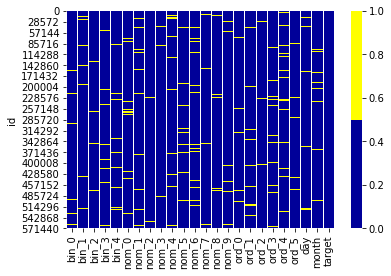

In [8]:
colors = ['#000099', '#ffff00']
sns.heatmap(train.isnull(), cmap=sns.color_palette(colors))

In [9]:
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print(f'{col} - {round(pct_missing * 100)}%')

bin_0 - 3.0%
bin_1 - 3.0%
bin_2 - 3.0%
bin_3 - 3.0%
bin_4 - 3.0%
nom_0 - 3.0%
nom_1 - 3.0%
nom_2 - 3.0%
nom_3 - 3.0%
nom_4 - 3.0%
nom_5 - 3.0%
nom_6 - 3.0%
nom_7 - 3.0%
nom_8 - 3.0%
nom_9 - 3.0%
ord_0 - 3.0%
ord_1 - 3.0%
ord_2 - 3.0%
ord_3 - 3.0%
ord_4 - 3.0%
ord_5 - 3.0%
day - 3.0%
month - 3.0%
target - 0.0%


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

###### Binary features

In [11]:
bin_3_map = {'T': 1, 'F': 0}
bin_4_map = {'Y': 1, 'N': 0}

train['bin_3'] = train['bin_3'].map(bin_3_map, na_action='ignore')
test['bin_3'] = test['bin_3'].map(bin_3_map, na_action='ignore')

train['bin_4'] = train['bin_4'].map(bin_4_map, na_action='ignore')
test['bin_4'] = test['bin_4'].map(bin_4_map, na_action='ignore')

###### Ordered features

In [17]:
ord_1_map = {
    'Novice': 1,
    'Contributor': 2,
    'Expert': 3,
    'Master': 4,
    'Grandmaster': 5
}

ord_2_map = {
    'Freezing': 1,
    'Cold': 2,
    'Warm': 3,
    'Hot': 4,
    'Boiling Hot': 5,
    'Lava Hot': 6
}

In [18]:
train['ord_1'] = train['ord_1'].map(ord_1_map, na_action='ignore')
test['ord_1'] = test['ord_1'].map(ord_1_map, na_action='ignore')


train['ord_2'] = train['ord_2'].map(ord_2_map, na_action='ignore')
test['ord_2'] = test['ord_2'].map(ord_2_map, na_action='ignore')

In [20]:
train.head(10)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,2.0,4.0,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,0.0,1.0,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,5.0,3.0,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,0.0,0.0,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,1.0,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,0.0,0.0,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,1.0,6.0,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,1.0,0.0,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,5.0,2.0,h,C,OZ,5.0,12.0,0
5,0.0,NaN,1.0,1.0,0.0,Red,Triangle,Lion,China,Bassoon,a2e1bf0b1,ae6737c29,8c30b9b0b,690411ac0,05afc0f8b,2.0,3.0,4.0,b,Q,wa,3.0,4.0,0
6,0.0,0.0,0.0,0.0,0.0,Red,Triangle,Hamster,Costa Rica,Bassoon,87a5be0d7,cdc35bd00,1cba571fa,b8e63cace,4d3766412,1.0,5.0,2.0,c,R,rg,5.0,6.0,0
7,0.0,0.0,1.0,1.0,0.0,Red,Triangle,Axolotl,Finland,Bassoon,104aee31d,2a50808ba,81d67e1bb,bd9643a20,a651dec43,3.0,3.0,2.0,b,Y,PS,1.0,1.0,0
8,0.0,0.0,0.0,0.0,0.0,Blue,Polygon,Hamster,Russia,Oboe,024efa364,a4a81ab45,429114096,94c5fd40c,NaN,1.0,1.0,5.0,c,N,mX,6.0,3.0,0
